In [46]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
from scipy.cluster.vq import whiten, kmeans2

In [51]:
def cal_api(url, result_key):
    json = ()
    try:
        json = requests.get(url, headers = {'X-Auth-Token': '8b13722e9a4545289e2a13442109b485'}).json()
        return json[result_key]
    except:
        print(json)
        return None

In [61]:
teams = cal_api('http://api.football-data.org/v1/soccerseasons/439/teams/', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [64]:
for team in teams:
    players = cal_api(team['_links']['players']['href'], 'players')
    fixtures = cal_api(team['_links']['fixtures']['href'], 'fixtures')
    wins = 0
    for f in fixtures:
        if team ['name'] == f['homeTeamName']:
            wins += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            wins += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} players, {} wins'.format(team['name'], len(players), wins))
    team['players'] = players
    team['wins'] = wins

Team "FC Rio Ave", 23 players, 36 wins
Team "FC Porto", 26 players, 88 wins
Team "Moreirense FC", 25 players, 27 wins
Team "FC Paços de Ferreira", 31 players, 31 wins
Team "Sporting CP", 27 players, 67 wins
Team "Maritimo Funchal", 28 players, 33 wins
Team "CD Tondela", 26 players, 34 wins
Team "SL Benfica", 24 players, 76 wins
Team "Boavista Porto FC", 29 players, 32 wins
Team "FC Arouca", 21 players, 0 wins
Team "Vitoria Setubal", 28 players, 36 wins
Team "C.F. Os Belenenses", 25 players, 29 wins
Team "Vitoria Guimaraes", 30 players, 39 wins
Team "Sporting Braga", 24 players, 70 wins
Team "GD Estoril Praia", 29 players, 26 wins
Team "Feirense", 29 players, 27 wins
Team "Nacional Funchal", 18 players, 0 wins
Team "G.D. Chaves", 22 players, 37 wins


In [66]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'players': len(team['players']), 'wins': team['wins']})
team_for_pd

[{'name': 'FC Rio Ave', 'players': 23, 'wins': 36},
 {'name': 'FC Porto', 'players': 26, 'wins': 88},
 {'name': 'Moreirense FC', 'players': 25, 'wins': 27},
 {'name': 'FC Paços de Ferreira', 'players': 31, 'wins': 31},
 {'name': 'Sporting CP', 'players': 27, 'wins': 67},
 {'name': 'Maritimo Funchal', 'players': 28, 'wins': 33},
 {'name': 'CD Tondela', 'players': 26, 'wins': 34},
 {'name': 'SL Benfica', 'players': 24, 'wins': 76},
 {'name': 'Boavista Porto FC', 'players': 29, 'wins': 32},
 {'name': 'FC Arouca', 'players': 21, 'wins': 0},
 {'name': 'Vitoria Setubal', 'players': 28, 'wins': 36},
 {'name': 'C.F. Os Belenenses', 'players': 25, 'wins': 29},
 {'name': 'Vitoria Guimaraes', 'players': 30, 'wins': 39},
 {'name': 'Sporting Braga', 'players': 24, 'wins': 70},
 {'name': 'GD Estoril Praia', 'players': 29, 'wins': 26},
 {'name': 'Feirense', 'players': 29, 'wins': 27},
 {'name': 'Nacional Funchal', 'players': 18, 'wins': 0},
 {'name': 'G.D. Chaves', 'players': 22, 'wins': 37}]

In [67]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,name,players,wins
0,FC Rio Ave,23,36
1,FC Porto,26,88
2,Moreirense FC,25,27
3,FC Paços de Ferreira,31,31
4,Sporting CP,27,67
5,Maritimo Funchal,28,33
6,CD Tondela,26,34
7,SL Benfica,24,76
8,Boavista Porto FC,29,32
9,FC Arouca,21,0


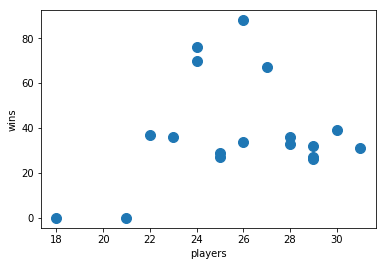

In [68]:
teams_pd.plot.scatter(x = 'players', y='wins', s = 100)

In [69]:
del teams_pd['name']
teams_pd

,players,wins
0,23,36
1,26,88
2,25,27
3,31,31
4,27,67
5,28,33
6,26,34
7,24,76
8,29,32
9,21,0


In [72]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[6.89139114, 1.58386454],
       [7.79026824, 3.87166887],
       [7.49064254, 1.1878984 ],
       [9.28839675, 1.36388335],
       [8.08989394, 2.94774789],
       [8.38951965, 1.45187583],
       [7.79026824, 1.49587206],
       [7.19101684, 3.34371402],
       [8.68914535, 1.40787959],
       [6.29213973, 0.        ],
       [8.38951965, 1.58386454],
       [7.49064254, 1.27589088],
       [8.98877105, 1.71585325],
       [7.19101684, 3.0797366 ],
       [8.68914535, 1.14390217],
       [8.68914535, 1.1878984 ],
       [5.39326263, 0.        ],
       [6.59176544, 1.62786077]])

In [76]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[6.29213973, 0.80293133],
        [7.56554897, 3.31071684],
        [8.38951965, 1.38148185]]),
 array([0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0]))

In [77]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'g',
 'b',
 'b',
 'g',
 'b',
 'b',
 'g',
 'b',
 'r',
 'b',
 'b',
 'b',
 'g',
 'b',
 'b',
 'r',
 'r']

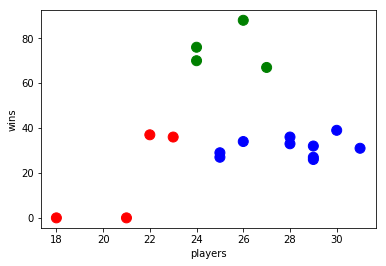

In [80]:
teams_pd.plot.scatter(x='players', y='wins', c=colors, s=100)

In [85]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[8.08989394, 2.94774789],
        [7.25094198, 1.43427733],
        [5.84270118, 0.        ],
        [7.39076731, 3.4317065 ],
        [8.73194902, 1.40787959]]),
 array([1, 3, 1, 4, 0, 4, 1, 3, 4, 2, 4, 1, 4, 3, 4, 4, 2, 1]))

In [87]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'y',
 'g',
 'm',
 'r',
 'm',
 'g',
 'y',
 'm',
 'b',
 'm',
 'g',
 'm',
 'y',
 'm',
 'm',
 'b',
 'g']

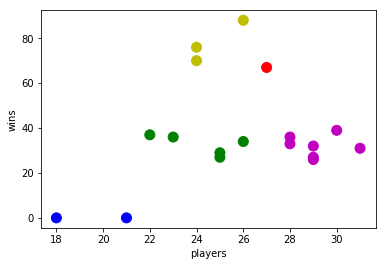

In [88]:
teams_pd.plot.scatter(x='players', y='wins', c=colors, s=100)